In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pylab import mpl
# 设置显示中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]

### 读数据

In [2]:
from data_utils import data_reader

data_path = './data'
data_file = "治疗过程记录.xlsx"
output_path = './outputs'
data = data_reader(data_path,data_file,fill_na="")

data

,mr_bah,mr_xb,mr_nn,mr_sjzyts,mr_cyzyzdmc,mr_cyqtzdmc1,mr_cyqtzdmc2,mr_cyqtzdmc3,mr_cyqtzdmc4,mr_cyqtzdmc5,...,specimen_code,item_group_name,item_code,item_name,result_quantitative,result_qualitative,result_unit,reference_range,reference_range_alert,report_date
1,L0001110255,1,55岁,201,创伤性蛛网膜下腔出血,多发性大脑挫裂伤,创伤性硬脑膜下出血,颅内感染,肺部感染,,...,2207063653,脑脊液生化(检),D0031,葡萄糖[Glu],0.59,0.59,mmol/L,2.5-4.5,L,20220706
2,L0001110255,1,55岁,201,创伤性蛛网膜下腔出血,多发性大脑挫裂伤,创伤性硬脑膜下出血,颅内感染,肺部感染,,...,2207063653,脑脊液生化(检),D0087,微量蛋白[MTP],2.02,2.02,g/L,0.15-0.45,H,20220706
3,L0001110255,1,55岁,201,创伤性蛛网膜下腔出血,多发性大脑挫裂伤,创伤性硬脑膜下出血,颅内感染,肺部感染,,...,2207063654,脑脊液细胞学检查(检),C0095,蛋白定性,250,阳性(+),,,,20220706
4,L0001110255,1,55岁,201,创伤性蛛网膜下腔出血,多发性大脑挫裂伤,创伤性硬脑膜下出血,颅内感染,肺部感染,,...,2207063654,脑脊液常规(检),C0093,透明度,244,混浊,,,,20220706
5,L0001110255,1,55岁,201,创伤性蛛网膜下腔出血,多发性大脑挫裂伤,创伤性硬脑膜下出血,颅内感染,肺部感染,,...,2207063654,脑脊液细胞学检查(检),C0093,透明度,244,混浊,,,,20220706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8368,L0001185712,1,66岁,22,枕叶出血,脑水肿,高血压病3级（极高危）,肺原位癌,肺部阴影,肺气肿,...,2311280890,脑脊液常规(检),C0093,透明度,244,混浊,,,,20231128
8369,L0001185712,1,66岁,22,枕叶出血,脑水肿,高血压病3级（极高危）,肺原位癌,肺部阴影,肺气肿,...,2311280890,脑脊液细胞学检查(检),C0100,多个核细胞百分比,70,70,%,,,20231128
8370,L0001185712,1,66岁,22,枕叶出血,脑水肿,高血压病3级（极高危）,肺原位癌,肺部阴影,肺气肿,...,2311280891,脑脊液生化(检),D0031,葡萄糖[Glu],2.70,2.70,mmol/L,2.5-4.5,,20231128
8371,L0001185712,1,66岁,22,枕叶出血,脑水肿,高血压病3级（极高危）,肺原位癌,肺部阴影,肺气肿,...,2311280891,脑脊液生化(检),D0087,微量蛋白[MTP],1.88,1.88,g/L,0.15-0.45,H,20231128


## 病症手术分析

In [4]:
from data_utils import patient_splitter
indicators = ['mr_bah', 'mr_xb', 'mr_nn', 'mr_sjzyts', 'mr_cyzyzdmc', 'mr_cyqtzdmc1',
       'mr_cyqtzdmc2', 'mr_cyqtzdmc3', 'mr_cyqtzdmc4', 'mr_cyqtzdmc5',
       'mr_cyqtzdmc6', 'mr_cyqtzdmc7', 'mr_cyqtzdmc8', 'mr_cyqtzdmc9',
       'mr_cyqtzdmc10', 'mr_ssmc1', 'mr_ssmzfs1', 'mr_sscxsj1', 'mr_ssmc2',
       'mr_ssmzfs2', 'mr_ssmc3', 'mr_ssmzfs3', 'mr_ssmc4', 'mr_ssmzfs4',
       'mr_sscxsj4']

Patients = patient_splitter(data,indicators=indicators)

In [5]:
from collections import Counter
def frequency_count(df):
    all_text = ' '.join(df.astype(str).values.flatten())

    # 使用Counter统计每个词的频率
    df_count = Counter(all_text.split())
    count_df = pd.DataFrame(df_count.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)
    
    return count_df

### 病症分析

In [6]:
relavant_illness = ['mr_cyzyzdmc', 'mr_cyqtzdmc1',
       'mr_cyqtzdmc2', 'mr_cyqtzdmc3', 'mr_cyqtzdmc4', 'mr_cyqtzdmc5',
       'mr_cyqtzdmc6', 'mr_cyqtzdmc7', 'mr_cyqtzdmc8', 'mr_cyqtzdmc9',
       'mr_cyqtzdmc10']

illness_df = Patients[relavant_illness]

illness_freq = frequency_count(illness_df)
categories = illness_freq['word']
num_categories = len(categories)

In [7]:
illness_freq.describe()

,frequency
count,329.000000
mean,2.793313
std,4.685195
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,40.000000


### 查看症状频数的分布

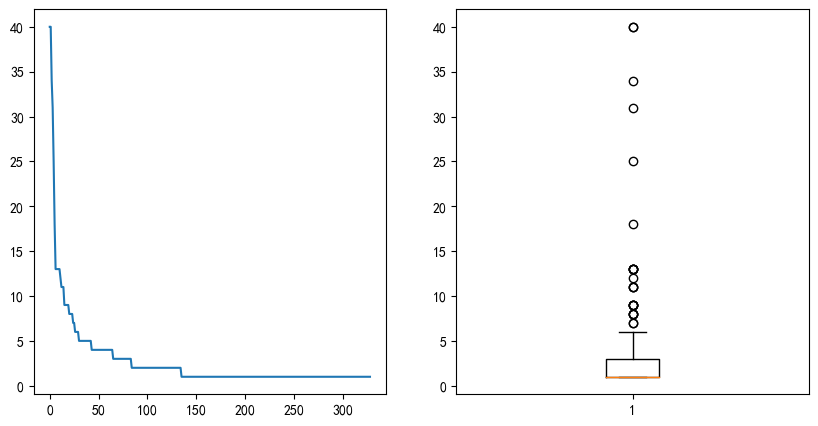

In [8]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(illness_freq['frequency'].to_numpy())
plt.subplot(1,2,2)
plt.boxplot(illness_freq['frequency'].to_numpy())
plt.show()

### onehot编码病症标签

In [9]:
from data_utils import one_hot

one_hot_matrix = one_hot(illness_df,categories)
one_hot_df = pd.DataFrame(one_hot_matrix)
col_data = one_hot_df["颅内感染"]
one_hot_df.drop("颅内感染", axis=1, inplace=True)
one_hot_df["颅内感染"] = col_data
one_hot_df

word,胸腔积液,肺部感染,脑水肿,高血压病3级（极高危）,面肌痉挛,电解质紊乱,三叉神经痛,颅内动脉瘤破裂伴蛛网膜下腔出血,肺气肿,低蛋白血症,...,椎间盘突出,共济失调,肺良性肿瘤,大脑动脉狭窄脑梗死,癫痫大发作状态,弥漫性颅内压增高,冠状动脉支架植入后状态,急性前间壁心肌梗死,肺原位癌,颅内感染
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
187,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
189,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LassoCV, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# 假设 one_hot_df 已经被加载为 pandas DataFrame
# 最后一列是目标变量A病
# one_hot_df = pd.read_csv("path_to_your_csv_file.csv") # 如果需要加载数据

# 分离特征和目标变量
X = one_hot_df.iloc[:, :-1]  # 所有特征
y = one_hot_df.iloc[:, -1]   # 目标变量（A病）

# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 分割数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 设置较小的alphas范围和其他参数
alphas = np.logspace(-6, -1.3, 100)  # 调整alphas的范围
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42, max_iter=10000, tol=1e-3)
lasso_cv.fit(X_train, y_train)

# 获取最佳正则化参数
best_alpha = lasso_cv.alpha_
print(f"Best alpha: {best_alpha}")

# 使用最佳alpha值重新训练Lasso模型
lasso = Lasso(alpha=best_alpha, max_iter=10000, tol=1e-2)
lasso.fit(X_train, y_train)

# 打印选中的特征数量和对应的系数
selected_features = np.where(np.abs(lasso.coef_) > 1e-4)[0]  # 根据系数的绝对值选择特征
selected_feature_names = X.columns[selected_features]
selected_feature_coefficients = lasso.coef_[selected_features]

print(f"Number of selected features: {len(selected_features)}")
print("Selected features and their coefficients:")
column_to_take1 = []
for name, coef in zip(selected_feature_names, selected_feature_coefficients):
    print(f"{name}: {coef}")
    column_to_take1.append(name)
column_to_take1.append("颅内感染")

# 预测和评估模型性能
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on test set: {mse}")

Best alpha: 0.05011872336272722
Number of selected features: 22
Selected features and their coefficients:
面肌痉挛: 0.04027967244261435
三叉神经痛: 0.036816812330540044
手术后颅内积气: 0.012355601433488394
低钠血症: 0.004890831830792117
多发性大脑挫裂伤: 0.004584021959636251
手术后切口愈合不良: 0.003568885942944948
外展神经损伤: 0.050000029624442825
脑室腹腔分流管置入感染: 0.034448293113838
脑实质出血继发蛛网膜下腔出血: 0.03131549739445843
额叶交界性肿瘤: 0.05000043993289808
椎动脉闭塞: 0.013204545971598633
肝血管瘤: 0.020917447169147306
药物和药剂引起的全身性皮疹: 0.023756121053150493
脑内脑积水: 0.02375609190667717
创伤性硬脑膜下出血: 0.021096787874214405
开放性颅脑损伤重型: 0.023757381178204254
昏迷: 0.02109807295303013
鞍区良性肿瘤: 0.0209218574478808
颞叶脓肿: 0.02376051709669246
手术后脑脊液漏: 0.011481789051619711
颅内动脉瘤破裂伴蛛网膜下隙出血: 0.023761709220183166
共济失调: 0.023761660949307765
Mean Squared Error on test set: 0.11586651185801472


### 分离频数过小数据样本

In [11]:
freq_list = illness_freq['frequency'].to_numpy()
sample_percent = np.cumsum(freq_list) / np.sum(freq_list) 
sample_to_take = sample_percent < 0.75

categories = illness_freq[sample_to_take]['word']
num_categories = len(categories)
categories

37            胸腔积液
4             肺部感染
3             颅内感染
41             脑水肿
70     高血压病3级（极高危）
          ...     
207          蛛网膜粘连
197           脑脊液漏
96           高血压3级
47           甲状腺结节
303     高血压病3级（高危）
Name: word, Length: 117, dtype: object

### 计算协同矩阵与相关性矩阵

In [12]:
category_matrix = one_hot_matrix[categories]

co_occurrence_matrix = category_matrix.T.dot(category_matrix)
correlation_matrix = co_occurrence_matrix.corr()
correlation_matrix

word,胸腔积液,肺部感染,颅内感染,脑水肿,高血压病3级（极高危）,面肌痉挛,电解质紊乱,三叉神经痛,颅内动脉瘤破裂伴蛛网膜下腔出血,肺气肿,...,创伤性脑脊液漏,创伤性颅内血肿,基底动脉蛛网膜下腔出血,颅内积气[气颅症],肝钙化灶,蛛网膜粘连,脑脊液漏,高血压3级,甲状腺结节,高血压病3级（高危）
word,,,,,,,,,,,,,,,,,,,,,
胸腔积液,1.000000,0.766127,0.322113,0.704452,0.452743,-0.003008,0.462027,0.020842,0.182449,0.452340,...,0.080441,0.265972,0.573436,0.075814,0.117687,-0.027929,0.031867,-0.071931,0.031867,-0.044870
肺部感染,0.766127,1.000000,0.389109,0.526319,0.603557,0.014465,0.615360,0.100130,0.276189,0.330983,...,0.257254,0.307127,0.455884,0.053067,0.070521,-0.000305,0.094626,-0.065393,0.202483,-0.008029
颅内感染,0.322113,0.389109,1.000000,0.290924,0.187421,0.486594,0.270567,0.429197,0.017164,0.108318,...,0.314256,0.294930,0.076507,0.407035,-0.012991,0.365191,0.311607,-0.016200,-0.025283,-0.028150
脑水肿,0.704452,0.526319,0.290924,1.000000,0.452636,0.064799,0.351916,0.019038,0.221154,0.369698,...,0.022833,0.078626,0.242565,0.291292,0.339226,-0.022499,0.064822,-0.066916,-0.007715,-0.038557
高血压病3级（极高危）,0.452743,0.603557,0.187421,0.452636,1.000000,0.059167,0.397795,0.178424,0.350478,0.209891,...,0.024554,0.035546,0.399970,0.043752,0.346226,0.007120,0.248905,-0.018227,0.053732,0.031387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
蛛网膜粘连,-0.027929,-0.000305,0.365191,-0.022499,0.007120,0.133389,0.017278,0.791983,-0.052121,-0.039470,...,0.035785,0.035807,-0.047521,0.090449,-0.048415,1.000000,0.057868,0.231334,-0.043185,-0.031189
脑脊液漏,0.031867,0.094626,0.311607,0.064822,0.248905,0.107667,0.100389,0.110080,-0.009256,-0.030665,...,0.063547,-0.015558,-0.008439,0.052616,-0.002149,0.057868,1.000000,0.065845,-0.076687,-0.055385
高血压3级,-0.071931,-0.065393,-0.016200,-0.066916,-0.018227,-0.013798,-0.047337,0.365274,-0.059306,-0.070174,...,-0.050898,-0.060681,-0.054071,-0.035489,-0.055089,0.231334,0.065845,1.000000,0.065845,-0.035489


### 保存中间结果

In [29]:
corr_path = os.path.join(output_path,"corr.csv")
occur_path = os.path.join(output_path,"occur.csv")
onehot_path = os.path.join(output_path,"onehot_illness.csv")
correlation_matrix.to_csv(corr_path)
co_occurrence_matrix.to_csv(occur_path)

one_hot_tosave = one_hot_matrix
one_hot_tosave.index = Patients['mr_bah']
one_hot_matrix.to_csv(onehot_path)

### 高相关性结果

In [14]:
corr_value = 0.4 #相关性阈值
corr_selected = (correlation_matrix.loc['颅内感染'] > corr_value).to_numpy()
high_corr_indicators = categories[corr_selected]
high_corr_indicators

3                颅内感染
76               面肌痉挛
80              三叉神经痛
36              低蛋白血症
21               脑内出血
19                脑积水
252           手术后颅内积气
186              低钠血症
1            多发性大脑挫裂伤
61          手术后切口愈合不良
71             小脑恶性肿瘤
284            外展神经损伤
28        脑室腹腔分流管置入感染
26     脑实质出血继发蛛网膜下腔出血
261         颅内积气[气颅症]
Name: word, dtype: object

# 有几种可能
- 颅内感染与其他疾病并发
- 颅内感染导致了其他疾病
- 其他疾病导致了颅内感染

### 条件概率：

$P(发生其他疾病|发生颅内感染)$

In [15]:
co_occurrence_matrix_np = co_occurrence_matrix.to_numpy()
all_freq = np.diagonal(co_occurrence_matrix_np)
infection = co_occurrence_matrix.loc['颅内感染']
condition_prob =  infection / all_freq
condition_prob = pd.DataFrame(condition_prob)

### 概率可视化

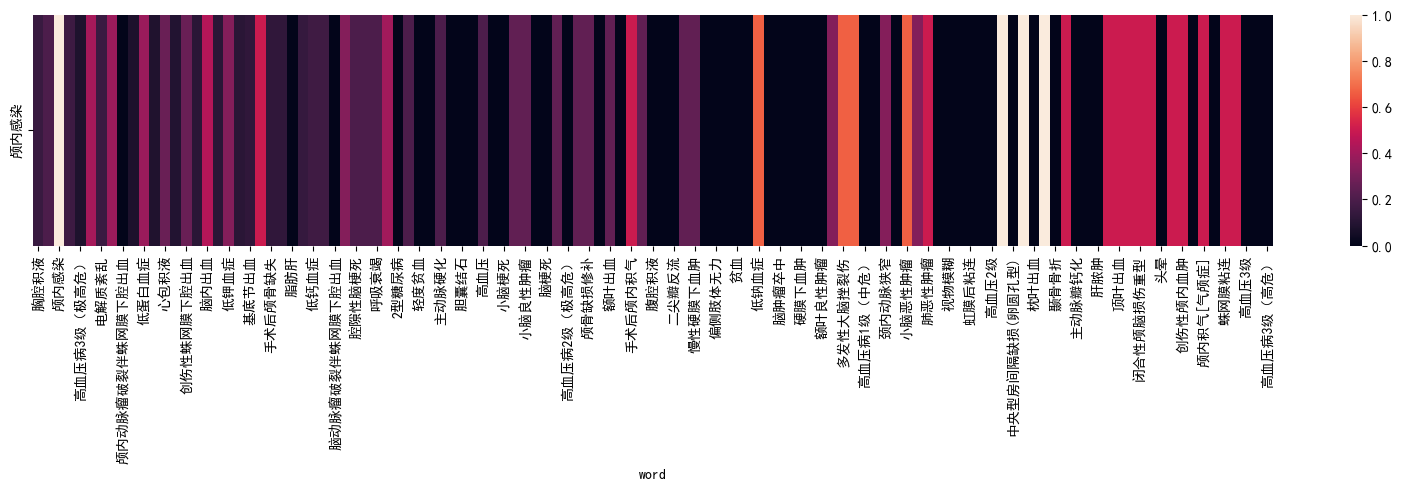

In [16]:
plt.figure(figsize=(20,3))
sns.heatmap(condition_prob.T)
plt.show()

### 高概率值

In [17]:
prob_value = 0.5 #概率阈值
prob_selected = (condition_prob > prob_value).to_numpy()
prob_selected = np.squeeze(prob_selected,axis=1)
high_prob_indicators = categories[prob_selected]
high_prob_indicators

3                颅内感染
186              低钠血症
1            多发性大脑挫裂伤
61          手术后切口愈合不良
71             小脑恶性肿瘤
284            外展神经损伤
28        脑室腹腔分流管置入感染
26     脑实质出血继发蛛网膜下腔出血
Name: word, dtype: object

In [18]:
# 共有的结果
a = np.intersect1d(high_prob_indicators,high_corr_indicators)
print(a)

['低钠血症' '外展神经损伤' '多发性大脑挫裂伤' '小脑恶性肿瘤' '手术后切口愈合不良' '脑实质出血继发蛛网膜下腔出血'
 '脑室腹腔分流管置入感染' '颅内感染']


In [19]:
columns_to_keep = a

column_to_take1
# 使用 drop 方法删除不需要的列
one_hot_df.drop(one_hot_df.columns.difference(column_to_take1), axis=1, inplace=True)
one_hot_df

word,面肌痉挛,三叉神经痛,手术后颅内积气,低钠血症,多发性大脑挫裂伤,手术后切口愈合不良,外展神经损伤,脑室腹腔分流管置入感染,脑实质出血继发蛛网膜下腔出血,额叶交界性肿瘤,...,脑内脑积水,创伤性硬脑膜下出血,开放性颅脑损伤重型,昏迷,鞍区良性肿瘤,颞叶脓肿,手术后脑脊液漏,颅内动脉瘤破裂伴蛛网膜下隙出血,共济失调,颅内感染
0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
187,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
189,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
from pgmpy.estimators import HillClimbSearch, BicScore

# 使用HillClimbSearch算法和BIC评分来学习贝叶斯网络结构
hc = HillClimbSearch(one_hot_df)
best_model = hc.estimate(scoring_method=BicScore(one_hot_df))

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [21]:
from pgmpy.estimators import BayesianEstimator
from pgmpy.inference import VariableElimination
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator


# 使用 BayesianEstimator 进行学习，考虑更多的参数和先验设置
model = BayesianNetwork(best_model.edges())
model.fit(one_hot_df, estimator=BayesianEstimator, prior_type='BDeu', equivalent_sample_size=10)

# 使用 VariableElimination 进行推断
inference = VariableElimination(model)

# 计算每个因素对目标变量的影响
causes = []
res = []
for factor in one_hot_df.columns[:-1]:  # 不包括目标变量本身
    if factor in model.nodes():
        prob_given_factor = inference.query(variables=['颅内感染'], evidence={factor: 1})
        causes.append((factor, prob_given_factor.values[1]))  # 取目标变量为1的概率
        res.append(factor)
            


# 按照对目标变量的影响排序
sorted_causes = sorted(causes, key=lambda x: x[1], reverse=True)
sorted_causes


[('外展神经损伤', 0.6428571428571429),
 ('脑室腹腔分流管置入感染', 0.6428571428571429),
 ('脑实质出血继发蛛网膜下腔出血', 0.6428571428571429),
 ('额叶交界性肿瘤', 0.6428571428571429),
 ('面肌痉挛', 0.4318181818181819),
 ('手术后切口愈合不良', 0.38128221649484545),
 ('手术后脑脊液漏', 0.3000263323941029),
 ('三叉神经痛', 0.1940298507462687),
 ('手术后颅内积气', 0.1940298507462687),
 ('低钠血症', 0.1940298507462687),
 ('多发性大脑挫裂伤', 0.1940298507462687),
 ('椎动脉闭塞', 0.1940298507462687),
 ('肝血管瘤', 0.1940298507462687),
 ('创伤性硬脑膜下出血', 0.1940298507462687),
 ('昏迷', 0.1940298507462687),
 ('鞍区良性肿瘤', 0.1940298507462687)]

In [22]:
r = np.intersect1d(a,res)
r

array(['低钠血症', '外展神经损伤', '多发性大脑挫裂伤', '手术后切口愈合不良', '脑实质出血继发蛛网膜下腔出血',
       '脑室腹腔分流管置入感染'], dtype=object)

In [23]:
import pandas as pd
import numpy as np

# 假设 one_hot_df 包含了离散因素 x1, x2, ..., x10 的频数数据以及目标变量 '颅内感染'

# 初始化关联度分数字典
relation_scores = {}

# 计算灰度关联度的函数
def grey_relation(factor_values, disease_values):
    n = len(factor_values)
    # 求因素与疾病之间的关联度分数
    factor_mean = np.mean(factor_values)
    disease_mean = np.mean(disease_values)
    factor_std = np.std(factor_values)
    disease_std = np.std(disease_values)
    factor_disease_cov = np.cov(factor_values, disease_values)[0, 1]
    
    # 计算关联度分数
    if disease_std == 0 or factor_std == 0:
        relation_score = 0
    else:
        relation_score = (2 * factor_disease_cov) / (factor_std ** 2 + disease_std ** 2 + (factor_mean - disease_mean) ** 2)
    
    return relation_score

# 计算每个因素与疾病的关联度
for factor in one_hot_df.columns[:-1]:  # 排除目标变量列
    factor_values = one_hot_df[factor].values
    disease_values = one_hot_df['颅内感染'].values
    
    # 计算灰度关联度
    relation_score = grey_relation(factor_values, disease_values)
    
    # 存储关联度分数
    relation_scores[factor] = relation_score

# 按关联度分数排序
sorted_factors = sorted(relation_scores.items(), key=lambda x: x[1], reverse=True)

# 输出导致疾病的主要因素
print("导致颅内感染的主要因素：")
for factor, score in sorted_factors:
    print(f"{factor}: {score}")



导致颅内感染的主要因素：
面肌痉挛: 0.1777506667075375
三叉神经痛: 0.1274434696651431
脑实质出血继发蛛网膜下腔出血: 0.09366546931126107
脑室腹腔分流管置入感染: 0.09366546931126069
额叶交界性肿瘤: 0.0936654693112604
外展神经损伤: 0.09366546931126037
低钠血症: 0.08202642698835079
手术后切口愈合不良: 0.08202642698835079
多发性大脑挫裂伤: 0.08202642698835032
手术后颅内积气: 0.07079723356487398
创伤性硬脑膜下出血: 0.04770328420416352
开放性颅脑损伤重型: 0.04770328420416352
昏迷: 0.04770328420416352
共济失调: 0.047703284204163345
颅内动脉瘤破裂伴蛛网膜下隙出血: 0.04770328420416333
鞍区良性肿瘤: 0.04770328420416331
颞叶脓肿: 0.04770328420416329
手术后脑脊液漏: 0.04770328420416329
椎动脉闭塞: 0.04770328420416327
肝血管瘤: 0.04770328420416326
药物和药剂引起的全身性皮疹: 0.047703284204163234
脑内脑积水: 0.04770328420416322


In [24]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# 假设 one_hot_df 是你的数据集，最后一列是目标变量“颅内感染”，其他列是特征
X = one_hot_df.drop(columns=['颅内感染'])
y = one_hot_df['颅内感染']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建随机森林分类器，并增加 n_estimators 和 max_depth 参数
rf_classifier = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=42)

# 使用交叉验证评估模型性能
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)

print(f"交叉验证平均准确率: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# 拟合模型
rf_classifier.fit(X_train, y_train)

# 获取特征重要性
feature_importances = rf_classifier.feature_importances_

# 将特征重要性与列名对应起来
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# 按照重要性降序排序
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 输出特征重要性
print("\n特征重要性:")
print(importance_df)

交叉验证平均准确率: 0.8224 ± 0.0159

特征重要性:
            Feature  Importance
0              面肌痉挛    0.088544
1             三叉神经痛    0.084716
6            外展神经损伤    0.083682
9           额叶交界性肿瘤    0.078542
7       脑室腹腔分流管置入感染    0.071310
8    脑实质出血继发蛛网膜下腔出血    0.061978
2           手术后颅内积气    0.047801
18             颞叶脓肿    0.040999
20  颅内动脉瘤破裂伴蛛网膜下隙出血    0.039624
15        开放性颅脑损伤重型    0.037877
13            脑内脑积水    0.036521
12    药物和药剂引起的全身性皮疹    0.035552
21             共济失调    0.035522
3              低钠血症    0.034655
4          多发性大脑挫裂伤    0.033721
17           鞍区良性肿瘤    0.031347
10            椎动脉闭塞    0.029407
16               昏迷    0.028359
14        创伤性硬脑膜下出血    0.028204
11             肝血管瘤    0.027892
5         手术后切口愈合不良    0.026598
19          手术后脑脊液漏    0.017148
